In [1]:
!unzip '/content/Pet Adoption.zip'

Archive:  /content/Pet Adoption.zip
   creating: Dataset/
  inflating: Dataset/train.csv       
  inflating: Dataset/test.csv        


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('/content/Dataset/train.csv')
test = pd.read_csv('/content/Dataset/test.csv')

In [4]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [6]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [8]:
def categorise(column, data):

  # CREATING DICTIONARY
  category_dict = {}
  for index in range(data[column].nunique()):
    category_dict[sorted(data[column].unique())[index]] = index
  
  # DEFINE CATEGORISING FUNCTION
  def game(key):
    return category_dict[key]

  # APPLYING FUNTION TO THE FEATURE
  data[column] = data[column].apply(game)

# *DATA ANALYSING AND FEATURE ENGINEERING*

In [9]:
full_df = pd.concat([train, test])

In [10]:
full_df.loc[full_df['length(m)'] == 0, 'length(m)'] = np.mean(full_df.drop(full_df[full_df['length(m)'] == 0].index)['length(m)'])

In [14]:
print(max(full_df['height(cm)']))
print(min(full_df['height(cm)']))
print(max(full_df['height(cm)']) - min(full_df['height(cm)']))

50.0
5.0
45.0


In [15]:
step = (max(full_df['height(cm)']) - min(full_df['height(cm)']))/5

def height_bins(ht):
  if (ht >= 5) and (ht < 5 + step):
    return 0
  elif (ht >= 5 + step) and (ht < 5 + 2*step):
    return 1
  elif (ht >= 5 + 2*step) and (ht < 5 + 3*step):
    return 2
  elif (ht >= 5 + 3*step) and (ht < 5 + 4*step):
    return 3
  else:
    return 4

full_df['height_bins'] = full_df['height(cm)'].apply(height_bins)

In [16]:
print(max(full_df['length(m)']))
print(min(full_df['length(m)']))
print(max(full_df['length(m)']) - min(full_df['length(m)']))

1.0
0.01
0.99


In [27]:
step = (max(full_df['length(m)']) - min(full_df['length(m)']))/4

def length_bins(ln):
  if (ln >= 0.01) & (ln < 0 + step):
    return 0
  elif (ln >= 0.01 + step) & (ln < 0.01 + 2*step):
    return 1
  elif (ln >= 0.01 + 2*step) & (ln < 0.01 + 3*step):
    return 2
  else:
    return 3

full_df['length_bins'] = full_df['length(m)'].apply(length_bins)

In [28]:
full_df['hbin + lbin'] = full_df['height_bins'].astype(str) + ' ' + full_df['length_bins'].astype(str)

In [29]:
categorise('hbin + lbin', full_df)
categorise('color_type', full_df)

In [66]:
full_df['date_diff'] = pd.to_datetime(full_df['listing_date']) - pd.to_datetime(full_df['issue_date'])
full_df['date_diff'] = full_df['date_diff'].apply(lambda diff: abs(diff.days))

In [31]:
full_df['X_diff_abs'] = abs(full_df['X2'] - full_df['X1'])

In [32]:
full_df['issue_year'] = full_df.issue_date.apply(lambda date : pd.to_datetime(date).year)
full_df['issue_month'] = full_df.issue_date.apply(lambda date : pd.to_datetime(date).month)
full_df['issue_day'] = full_df.issue_date.apply(lambda date : pd.to_datetime(date).day)
full_df['listing_year'] = full_df.listing_date.apply(lambda date : pd.to_datetime(date).year)
full_df['listing_month'] = full_df.listing_date.apply(lambda date : pd.to_datetime(date).month)
full_df['listing_day'] = full_df.listing_date.apply(lambda date : pd.to_datetime(date).day)
full_df['listing_hours'] = full_df.listing_date.apply(lambda date : pd.to_datetime(date).hour)
full_df['listing_mins'] = full_df.listing_date.apply(lambda date : pd.to_datetime(date).minute)

In [33]:
full_df.condition.fillna(value=3.0, inplace=True)

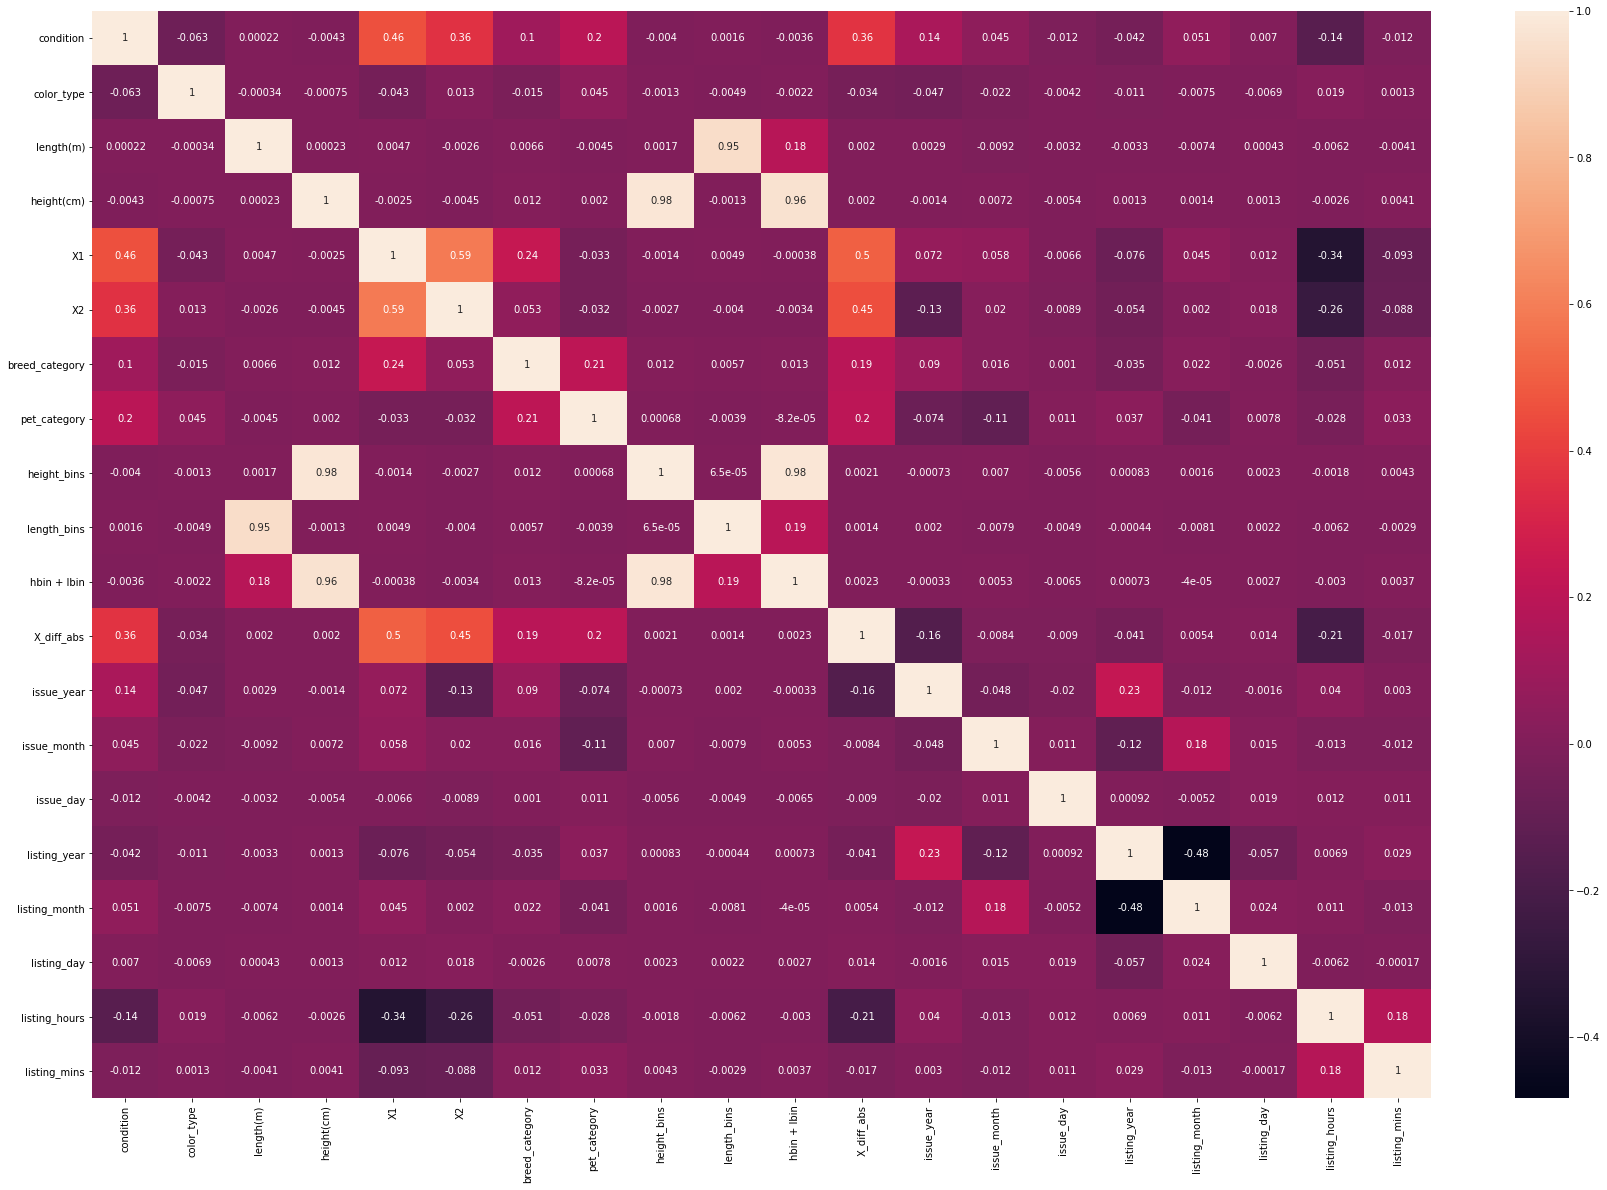

In [36]:
plt.figure(figsize=(30,20))
sns.heatmap(full_df.corr(), annot=True)

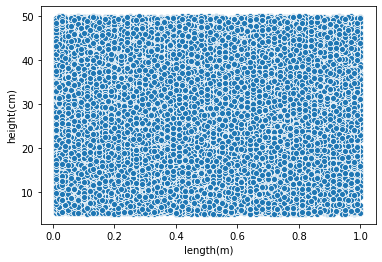

In [37]:
sns.scatterplot(x='length(m)', y='height(cm)', data=full_df)

# *IMPORTS*

In [38]:
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import * 
from sklearn.impute import KNNImputer
!pip install catboost
from catboost import *
from xgboost import *
from lightgbm import *

     |████████████████████████████████| 66.1MB 57kB/s 


# *CREATING X AND Y*

In [67]:
train_df = full_df[full_df.pet_category.notnull()]
test_df = full_df[full_df.pet_category.isnull()]

In [68]:
print(len(train_df))
print(len(test_df))

18834
8072


In [69]:
X = train_df.drop(['pet_id', 'issue_date', 'listing_date', 'pet_category', 'breed_category'], axis=1)
y = train_df[['pet_category', 'breed_category']]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# *CATBOOST*

In [71]:
skf_cat = StratifiedKFold(10)
accuracy = []
predictions_pet_cat = []
predictions_breed_cat = []
model = []
i=1
skf_cat.get_n_splits(X,y.pet_category)
for train_index, test_index in skf_cat.split(X,y.pet_category):
  
  X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
  y1_train_pet, y1_test_pet = y['pet_category'].iloc[train_index], y['pet_category'].iloc[test_index]
  y1_train_breed, y1_test_breed = y['breed_category'].iloc[train_index], y['breed_category'].iloc[test_index]
  
  print(f'FOLD {i} : ', end='')

  # PET MODEL : 
  model_cat_pet = CatBoostClassifier(iterations=10000, depth=4, learning_rate=0.60, od_type='Iter', verbose=False)

  model_cat_pet.fit(X1_train.drop([], axis=1).astype(int), y1_train_pet.astype(int),
                    cat_features=['condition', 'color_type', 'X1', 'X2'],
                    eval_set=(X1_test.drop([], axis=1).astype(int), y1_test_pet))

  labels_pet_cat = model_cat_pet.predict(X1_test.drop([], axis=1).astype(int))
  pred_pet_cat = model_cat_pet.predict(test_df[X1_train.drop([], axis=1).columns].astype(int))

  score_pet_cat = f1_score(y1_test_pet, labels_pet_cat, average='weighted')
  print(f'f1_score pet: {score_pet_cat} ... ', end='')

  # BREED MODEL : 
  model_cat_breed = CatBoostClassifier(iterations=10000, learning_rate=0.09, od_type='Iter', verbose=False)

  model_cat_breed.fit(X1_train.drop(['length(m)'], axis=1).astype(int), y1_train_breed.astype(int),
                      cat_features=['condition', 'color_type', 'X1', 'X2'],
                      eval_set=(X1_test.drop(['length(m)'], axis=1).astype(int), y1_test_breed))
  
  labels_breed_cat = model_cat_breed.predict(X1_test.drop(['length(m)'], axis=1).astype(int))
  pred_breed_cat = model_cat_breed.predict(test_df[X1_train.drop(['length(m)'], axis=1).columns].astype(int))

  score_breed_cat = f1_score(y1_test_breed, labels_breed_cat, average='weighted')
  print(f'f1_score breed: {score_breed_cat} ... ')

  predictions_pet_cat.append(pd.DataFrame(data=pred_pet_cat))
  predictions_breed_cat.append(pd.DataFrame(data=pred_breed_cat))

  score_cat = (score_breed_cat + score_pet_cat) / 2

  accuracy.append(score_cat)
  
  print(f'FINAL SCORE : {score_cat}')
  print('--------------------------------------------------------------------------')

  i += 1

print(f'\nMean : {np.mean(accuracy)}')

FOLD 1 : f1_score pet: 0.9053031836403646 ... f1_score breed: 0.9098571423507974 ... 
FINAL SCORE : 0.907580162995581
--------------------------------------------------------------------------
FOLD 2 : f1_score pet: 0.9064853629430488 ... f1_score breed: 0.8993929705983645 ... 
FINAL SCORE : 0.9029391667707067
--------------------------------------------------------------------------
FOLD 3 : f1_score pet: 0.8978662140153746 ... f1_score breed: 0.9064857591964155 ... 
FINAL SCORE : 0.902175986605895
--------------------------------------------------------------------------
FOLD 4 : f1_score pet: 0.916574800088391 ... f1_score breed: 0.9101343065696846 ... 
FINAL SCORE : 0.9133545533290378
--------------------------------------------------------------------------
FOLD 5 : f1_score pet: 0.912791253082627 ... f1_score breed: 0.9179651985567641 ... 
FINAL SCORE : 0.9153782258196955
--------------------------------------------------------------------------
FOLD 6 : f1_score pet: 0.904071871

In [72]:
submission_cat = pd.DataFrame(data={'breed_category' : list(predictions_breed_cat[3][0]), 'pet_category' : list(predictions_pet_cat[3][0])}, 
                          index=test_df.pet_id)
submission_cat.to_csv('submission_cat.csv')
submission_cat

,breed_category,pet_category
pet_id,,
ANSL_75005,1,2
ANSL_76663,0,1
ANSL_58259,0,2
ANSL_67171,0,2
ANSL_72871,0,2
...,...,...
ANSL_66809,1,2
ANSL_59041,1,2
ANSL_60034,1,2
